In [1]:
# Moving Average Formula -> Auto Correlation Plot(ACF) (MA)

# Autoregressive model -> Partial Auto Correlation Plot(PACF) (AR)

# AR(Autoregressor) + I(Integrated) + MA(Moving Average) = ARIMA

# SARIMAX

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sms
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_airline = pd.read_csv('airline_passengers.csv')
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
df_airline.isnull()

,Month,Thousands of Passengers
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
140,False,False
141,False,False
142,False,False
143,False,False


In [5]:
# Total number of 'null' values
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [6]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [7]:
df_airline.dropna(axis=0, inplace=True)

In [8]:
df_airline.tail()

,Month,Thousands of Passengers
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [9]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [10]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [11]:
df_airline.describe()

,Thousands of Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [12]:
df_airline['Month'] = pd.to_datetime(df_airline['Month'])

In [13]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [14]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [15]:
df_airline.set_index('Month', inplace=True)

In [16]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [17]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Thousands of Passengers  144 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


<AxesSubplot:xlabel='Month'>

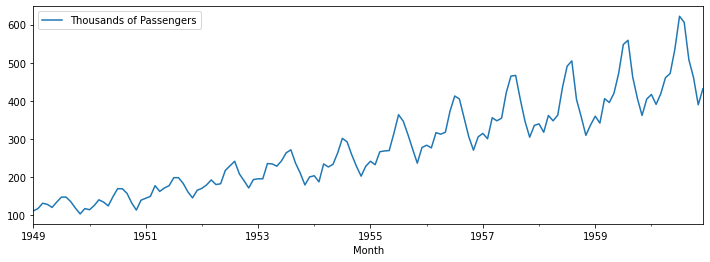

In [18]:
df_airline.plot(figsize=(12,4))
# this looks like a seasonal plot

In [19]:
# We will import dickey fuller test because to analyse dataset we need 'STATIONARY DATA'
from statsmodels.tsa.stattools import adfuller

In [20]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics: {}'. format(result[0]))
    print('p-value: {}'. format(result[1]))
    if result[1] <= 0.05:
        print("Reject Null Hypothesis: data has no unit root and it is stationary ")
    else:
        print("Fail to reject Null Hypothesis: Timeseries has a unit root indicating it is non stationary")

In [21]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060543
p-value: 0.9918802434376411
Fail to reject Null Hypothesis: Timeseries has a unit root indicating it is non stationary


In [22]:
# Use Differencing to make data stationary
df_airline['Passenger_1_Difference'] = df_airline['Thousands of Passengers'] - df_airline['Thousands of Passengers'].shift(1)

In [23]:
df_airline.head()

,Thousands of Passengers,Passenger_1_Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [24]:
adf_test(df_airline['Passenger_1_Difference'].dropna())

ADF Statistics: -2.8292668241700034
p-value: 0.054213290283824954
Fail to reject Null Hypothesis: Timeseries has a unit root indicating it is non stationary


In [25]:
# Use Second Differencing to make data stationary
df_airline['Passenger_2_Difference'] = df_airline['Passenger_1_Difference'] - df_airline['Passenger_1_Difference'].shift(1)

In [26]:
df_airline.head()

,Thousands of Passengers,Passenger_1_Difference,Passenger_2_Difference
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0


In [27]:
adf_test(df_airline['Passenger_2_Difference'].dropna())

ADF Statistics: -16.384231542468488
p-value: 2.7328918500143186e-29
Reject Null Hypothesis: data has no unit root and it is stationary 


### Seasonal Data -> shift(12)

In [28]:
# Now we know that the data given was seasonal data (i.e for 12 months or an year)
# shift (12)
df_airline['Passenger_12_Difference'] = df_airline['Thousands of Passengers'] - df_airline['Thousands of Passengers'].shift(12)

In [29]:
df_airline.head(15)

,Thousands of Passengers,Passenger_1_Difference,Passenger_2_Difference,Passenger_12_Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
1949-06-01,135.0,14.0,22.0,NaN
1949-07-01,148.0,13.0,-1.0,NaN
1949-08-01,148.0,0.0,-13.0,NaN
1949-09-01,136.0,-12.0,-12.0,NaN


In [30]:
adf_test(df_airline['Passenger_12_Difference'].dropna())

ADF Statistics: -3.3830207264924805
p-value: 0.011551493085514982
Reject Null Hypothesis: data has no unit root and it is stationary 


### PACF and ACF Plots

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

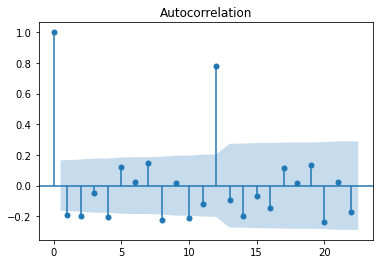

In [32]:
#Pearson correlation

acf = plot_acf(df_airline['Passenger_2_Difference'].dropna())

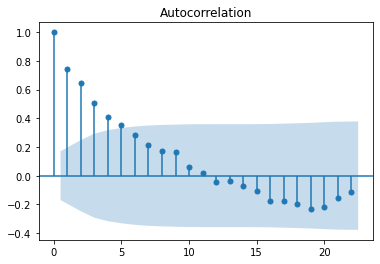

In [33]:
acf12 = plot_acf(df_airline['Passenger_12_Difference'].dropna())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


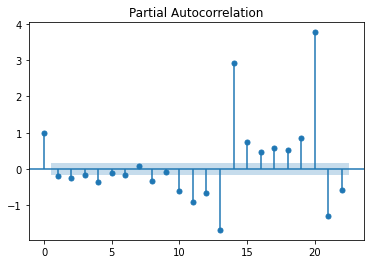

In [34]:
pacf2 = plot_pacf(df_airline['Passenger_2_Difference'].dropna())

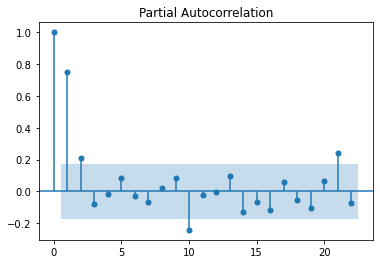

In [35]:
pacf12 = plot_pacf(df_airline['Passenger_12_Difference'].dropna())

### Split test and train data

In [36]:
df_airline

,Thousands of Passengers,Passenger_1_Difference,Passenger_2_Difference,Passenger_12_Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [37]:
from datetime import datetime, timedelta
train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)

In [38]:
train_data = df_airline[:train_dataset_end]
test_data = df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [39]:
train_data.tail()

,Thousands of Passengers,Passenger_1_Difference,Passenger_2_Difference,Passenger_12_Difference
Month,,,,
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0
1955-11-01,237.0,-37.0,1.0,34.0
1955-12-01,278.0,41.0,78.0,49.0


In [40]:
test_data.tail()

,Thousands of Passengers,Passenger_1_Difference,Passenger_2_Difference,Passenger_12_Difference
Month,,,,
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0
1960-11-01,390.0,-71.0,-24.0,28.0
1960-12-01,432.0,42.0,113.0,27.0


In [41]:
#prediction
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [42]:
test_data

,Thousands of Passengers,Passenger_1_Difference,Passenger_2_Difference,Passenger_12_Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


### Create ARIMA Model

In [43]:
from statsmodels.tsa.arima_model import ARIMA

In [44]:
train_data

,Thousands of Passengers,Passenger_1_Difference,Passenger_2_Difference,Passenger_12_Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [47]:
model_ARIMA = ARIMA(train_data['Thousands of Passengers'], order=(2,2,6)) # p,d ,f
# check PACF graph for p value where after 14 bars the bars goes up
# check ACF graph for q value where after 12 bars the bars goes up

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

In [48]:
model_ARIMA_fit = model_ARIMA.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [49]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ARIMA Model Results                                  
======================================================================================
Dep. Variable:     D2.Thousands of Passengers   No. Observations:                   82
Model:                         ARIMA(2, 2, 6)   Log Likelihood                -351.924
Method:                               css-mle   S.D. of innovations             15.901
Date:                        Sat, 05 Mar 2022   AIC                            723.848
Time:                                20:18:05   BIC                            747.915
Sample:                            03-01-1949   HQIC                           733.510
                                 - 12-01-1955                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.0148      0.019      0.798      0.425      -0.022       0.051
ar.L1.D2.Thousands of Passengers    -0.5235      0.224     -2.337      0.019      -0.963      -0.084
ar.L2.D2.Thousands of Passengers    -0.5302      0.131     -4.034      0.000      -0.788      -0.273
ma.L1.D2.Thousands of Passengers    -0.4302      0.238     -1.809      0.070      -0.896       0.036
ma.L2.D2.Thousands of Passengers    -0.3433      0.186     -1.846      0.065      -0.708       0.021
ma.L3.D2.Thousands of Passengers    -0.7929      0.195     -4.076      0.000      -1.174      -0.412
ma.L4.D2.Thousands of Passengers    -0.3848      0.161     -2.391      0.017      -0.700      -0.069
ma.L5.D2.Thousands of Passengers     0.6727      0.159      4.220      0.000       0.360       0.985
ma.L6.D2.Thousands of Passengers     0.2785      0.206      1.349      0.177      -0.126       0.683
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.4937           -1.2815j            1.3733           -0.3085
AR.2           -0.4937           +1.2815j            1.3733            0.3085
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2            1.0000           +0.0000j            1.0000            0.0000
MA.3           -0.2356           -0.9718j            1.0000           -0.2879
MA.4           -0.2356           +0.9718j            1.0000            0.2879
MA.5           -1.4257           -0.0000j            1.4257           -0.5000
MA.6           -2.5183           -0.0000j            2.5183           -0.5000
-----------------------------------------------------------------------------
"""

In [50]:
# Model Prediction
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [51]:
pred = model_ARIMA_fit.predict(start = pred_start_date, end = pred_end_date)
residuals = test_data['Thousands of Passengers'] - pred

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [52]:
residuals

Month
1956-01-01    301.780593
1956-02-01    300.522148
1956-03-01    306.864195
1956-04-01    330.521915
1956-05-01    311.641602
1956-06-01    364.123171
1956-07-01    421.512046
1956-08-01    405.750316
1956-09-01    350.063252
1956-10-01    308.156318
1956-11-01    272.458346
1956-12-01    304.062680
1957-01-01    315.210557
1957-02-01    301.886596
1957-03-01    355.393753
1957-04-01    347.816852
1957-05-01    355.386919
1957-06-01    421.864116
1957-07-01    464.835549
1957-08-01    467.127720
1957-09-01    403.989904
1957-10-01    346.907134
1957-11-01    305.023544
1957-12-01    336.006487
1958-01-01    339.953691
1958-02-01    317.990376
1958-03-01    361.999165
1958-04-01    347.975111
1958-05-01    362.983044
1958-06-01    434.991645
1958-07-01    490.982936
1958-08-01    504.982935
1958-09-01    403.987554
1958-10-01    358.985136
1958-11-01    309.983953
1958-12-01    336.985854
1959-01-01    359.985486
1959-02-01    341.984671
1959-03-01    405.985293
1959-04-01    395.9

<AxesSubplot:ylabel='Density'>

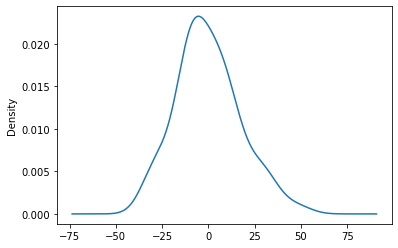

In [53]:
model_ARIMA_fit.resid.plot(kind='kde')

In [54]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 1956-01-01 to 1960-12-01
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Thousands of Passengers  60 non-null     float64
 1   Passenger_1_Difference   60 non-null     float64
 2   Passenger_2_Difference   60 non-null     float64
 3   Passenger_12_Difference  60 non-null     float64
dtypes: float64(4)
memory usage: 2.3 KB


<AxesSubplot:xlabel='Month'>

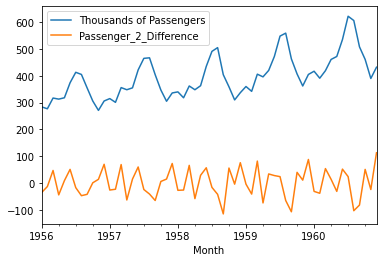

In [55]:
test_data[['Thousands of Passengers', 'Passenger_2_Difference']].plot()

In [56]:
# There is a hoge difference in the plots which means ARIMA is not giving a good model

### Create SARIMAX Model

In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

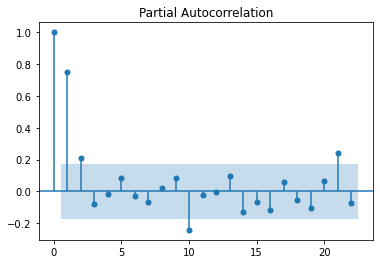

In [58]:
# for p value
pacf12 = plot_pacf(df_airline['Passenger_12_Difference'].dropna())

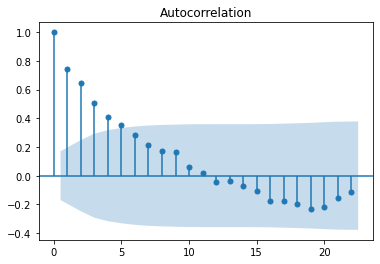

In [59]:
# for q value
acf12 = plot_acf(df_airline['Passenger_12_Difference'].dropna())

In [60]:
model_SARIMAX = SARIMAX(train_data['Thousands of Passengers'], order=(3,0,5), seasonal_order=(0,1,0,12))
# 3, 0, 5  : selected from the graph above
# (0,1,0,12): p,d,q,seasonal time(12 months)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [61]:
model_SARIMAX_fit = model_SARIMAX.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [62]:
model_SARIMAX_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Sat, 05 Mar 2022   AIC                            548.481
Time:                                     20:18:07   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5984      0.937      0.638      0.523      -1.239       2.436
ar.L2          0.8311      0.232      3.581      0.000       0.376       1.286
ar.L3         -0.4526      0.894     -0.507      0.613      -2.204       1.299
ma.L1          0.1837      1.164      0.158      0.875      -2.097       2.465
ma.L2         -0.5342      1.262     -0.423      0.672      -3.007       1.938
ma.L3         -0.0986      0.384     -0.257      0.797      -0.851       0.654
ma.L4         -0.1272      0.337     -0.377      0.706      -0.788       0.534
ma.L5          0.2471      0.357      0.693      0.488      -0.452       0.946
sigma2        87.7321     81.097      1.082      0.279     -71.214     246.679
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [63]:
# Model Prediction
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [64]:
pred_SARIMAX = model_SARIMAX_fit.predict(start = datetime(1956,6,6), end = datetime(1960,12,1))
residuals = test_data['Thousands of Passengers'] - pred_SARIMAX

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


<AxesSubplot:xlabel='Month'>

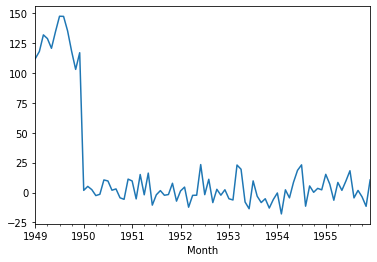

In [65]:
model_SARIMAX_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

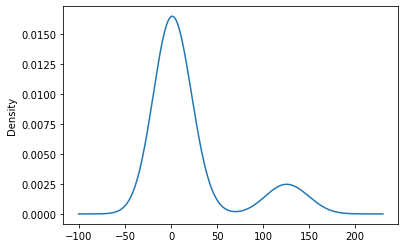

In [66]:
model_SARIMAX_fit.resid.plot(kind='kde')

In [67]:
test_data['Predited_SARIMA'] = pred_SARIMAX

C:\Users\prash\AppData\Local\Temp/ipykernel_22220/2725573695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predited_SARIMA'] = pred_SARIMAX


In [68]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 1956-01-01 to 1960-12-01
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Thousands of Passengers  60 non-null     float64
 1   Passenger_1_Difference   60 non-null     float64
 2   Passenger_2_Difference   60 non-null     float64
 3   Passenger_12_Difference  60 non-null     float64
 4   Predited_SARIMA          54 non-null     float64
dtypes: float64(5)
memory usage: 4.9 KB


<AxesSubplot:xlabel='Month'>

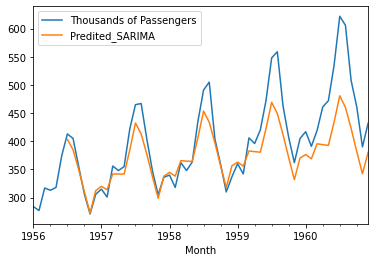

In [69]:
test_data[['Thousands of Passengers', 'Predited_SARIMA']].plot()